In [21]:
import scanpy as sc
import scvi
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
DATA = Path("../data")
MODEL = Path("../model")

In [6]:
vae = scvi.model.SCVI.load(MODEL / 'trained2.model')
adata = vae.adata

INFO     File ..\model\trained2.model\model.pt already downloaded                                                  


In [7]:
adata_dnt = adata[
    (adata.obs.cell_type == "aDNT") | 
    (adata.obs.cell_type == "nDNT")]

In [ ]:
adata_dnt = adata_dnt.copy()
scvi.model.SCVI.setup_anndata(
    adata_dnt,
    layer='counts',
    batch_key='batch',
    continuous_covariate_keys=['pct_counts_mt'])
vae_dnt = scvi.model.SCVI(adata_dnt)
vae_dnt.train()

In [ ]:
scvi.model.SCVI.save(vae_dnt,MODEL / "vae_dnt",save_anndata=True,overwrite=True)

In [8]:
vae_dnt = scvi.model.SCVI.load(MODEL / 'vae_dnt')

INFO     File ..\model\vae_dnt\model.pt already downloaded                                                         


In [9]:
adata_dnt = vae_dnt.adata

In [10]:
adata_dnt.obsm['X_scVi'] = vae_dnt.get_latent_representation()
adata_dnt.obsm['X_norm'] = vae_dnt.get_normalized_expression()

In [11]:
sc.pp.neighbors(adata_dnt,use_rep='X_scVi')

c:\Users\xuqin\miniconda3\envs\scvi-env\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\xuqin\miniconda3\envs\scvi-env\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\xuqin\miniconda3\envs\scvi-env\lib\site-packages\umap\distances.py:1086: 

In [12]:
sc.tl.leiden(adata_dnt,resolution=0.1)
sc.tl.umap(adata_dnt)

c:\Users\xuqin\miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


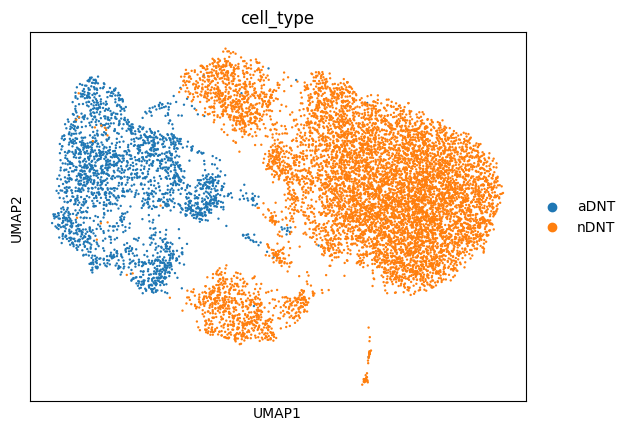

In [13]:
sc.pl.umap(adata_dnt, color=['cell_type'])

In [14]:
de_dnt=vae_dnt.differential_expression(
    groupby='cell_type',
    group1=["aDNT"],
    group2="nDNT",
    batch_correction = True,
    batchid1 = ['b1','b2'])

DE...: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


In [15]:
df_markers = de_dnt[
    (de_dnt['proba_de'] > 0.95) &
    (de_dnt['bayes_factor'] > 1) &
    (de_dnt['lfc_mean'] < 0)
    ]

In [16]:
markers = {}
markers["nDNT"] = df_markers.index.tolist()[:10]

In [17]:
de_dnt2=vae_dnt.differential_expression(
    groupby='cell_type',
    group1=["nDNT"],
    group2="aDNT",
    batch_correction = True,
    batchid1 = ['b1','b2'])

DE...: 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


In [18]:
df_markers2 = de_dnt2[
    (de_dnt2['proba_de'] > 0.95) &
    (de_dnt2['bayes_factor'] > 1) &
    (de_dnt2['lfc_mean'] < 0)
    ]

In [19]:
markers["aDNT"] = df_markers2.index.tolist()[:10]

In [20]:
def to_curly(gene: str) -> str:
    curly_gene = ("$" + gene + "$")
    return curly_gene

symbols = []
for name in markers:
    symbols.extend(list(map(to_curly,markers[name])))

c:\Users\xuqin\miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


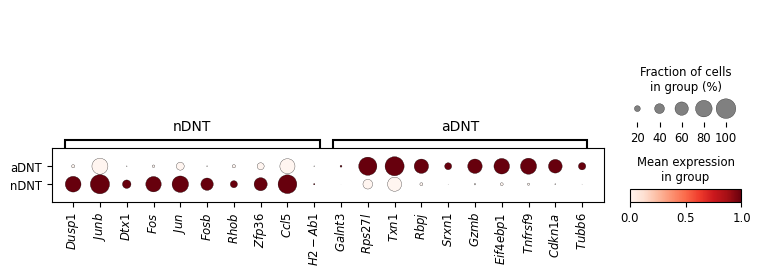

In [22]:
ax = sc.pl.dotplot(
    adata_dnt,
    markers,
    groupby='cell_type',
    use_raw=True,
    standard_scale='var',
    show=False)

ax['mainplot_ax'].set_xticklabels(symbols)
plt.show()

In [23]:
adata_ndnt = adata[adata.obs['cell_type'] == 'nDNT']

In [48]:
adata_ndnt = adata_ndnt.copy()
scvi.model.SCVI.setup_anndata(
    adata_ndnt,
    layer='counts',
    batch_key='batch',
    continuous_covariate_keys=['pct_counts_mt']
    )
vae_ndnt = scvi.model.SCVI(adata_ndnt)
vae_ndnt.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [03:38<00:00,  1.88it/s, v_num=1, train_loss_step=1.1e+3, train_loss_epoch=1.13e+3] 

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [03:38<00:00,  1.83it/s, v_num=1, train_loss_step=1.1e+3, train_loss_epoch=1.13e+3]


In [49]:
adata_ndnt.obsm['X_scVi'] = vae_ndnt.get_latent_representation()
adata_ndnt.obsm['X_norm'] = vae_ndnt.get_normalized_expression()

In [61]:
scvi.model.SCVI.save(vae_ndnt,MODEL / 'vae_ndnt',overwrite=True,save_anndata=True)

In [24]:
vae_ndnt = scvi.model.SCVI.load(MODEL / 'vae_ndnt')
adata_ndnt = vae_ndnt.adata

INFO     File ..\model\vae_ndnt\model.pt already downloaded                                                        


In [25]:
adata_ndnt.obsm['X_scVi'] = vae_ndnt.get_latent_representation()
adata_ndnt.obsm['X_norm'] = vae_ndnt.get_normalized_expression()

In [26]:
sc.pp.neighbors(adata_ndnt, use_rep='X_scVi')

In [27]:
sc.tl.leiden(adata_ndnt,resolution=0.1)
sc.tl.umap(adata_ndnt,min_dist=0.3)

c:\Users\xuqin\miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


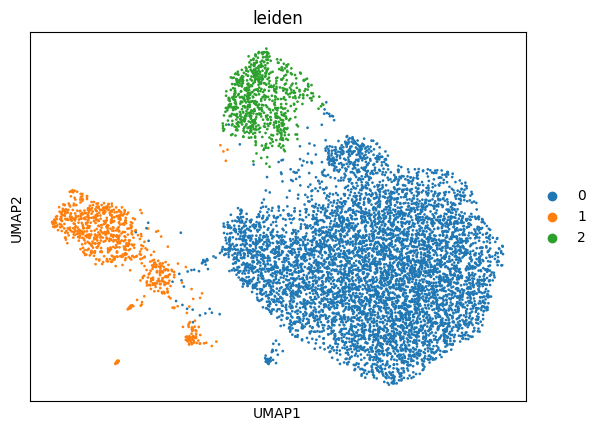

In [28]:
sc.pl.umap(adata_ndnt, color=['leiden'])

In [29]:
de_ndnt = vae_ndnt.differential_expression(
    groupby='leiden'
)

DE...: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]


In [31]:
ndnt_markers = de_ndnt[
    (de_ndnt['proba_de'] > 0.95) &
    (de_ndnt['bayes_factor'] > 1) &
    (de_ndnt['lfc_mean'] > 1)
]

In [33]:
markers_group = ndnt_markers.groupby('comparison')

In [34]:
markers2 = {}
for name in markers_group.groups.keys():
    markers2[name] = markers_group.get_group(name).index.tolist()[:10]

In [35]:
symbols = []
for name in markers2:
    symbols.extend(list(map(to_curly,markers2[name])))

c:\Users\xuqin\miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


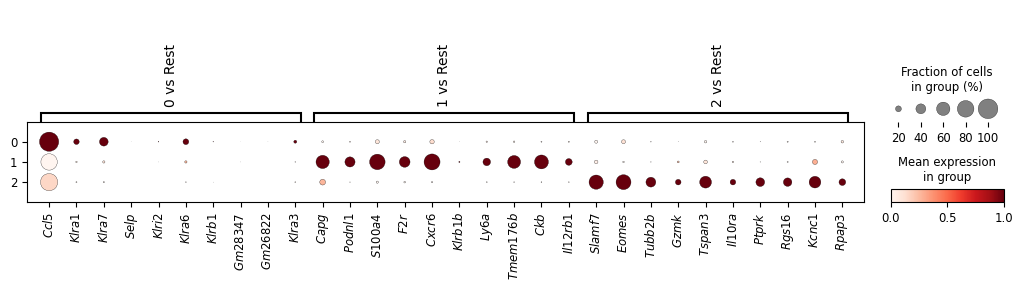

In [36]:
ax = sc.pl.dotplot(
    adata_ndnt,
    markers2,
    groupby='leiden',
    use_raw=True,
    standard_scale='var',
    show=False
    )
ax['mainplot_ax'].set_xticklabels(symbols)
plt.show()

In [37]:
adata_adnt = adata[adata.obs['cell_type'] == 'aDNT']

In [68]:
adata_adnt = adata_adnt.copy()
scvi.model.SCVI.setup_anndata(
    adata_adnt,
    layer='counts',
    batch_key='batch',
    continuous_covariate_keys=['pct_counts_mt']
)
vae_adnt = scvi.model.SCVI(adata_adnt)
vae_adnt.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:06<00:00,  6.26it/s, v_num=1, train_loss_step=1.95e+3, train_loss_epoch=2.02e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:07<00:00,  5.97it/s, v_num=1, train_loss_step=1.95e+3, train_loss_epoch=2.02e+3]


In [69]:
scvi.model.SCVI.save(vae_adnt,MODEL / 'vae_adnt',overwrite=True,save_anndata=True)

In [38]:
vae_adnt = scvi.model.SCVI.load(MODEL / 'vae_adnt')
adata_adnt = vae_adnt.adata

INFO     File ..\model\vae_adnt\model.pt already downloaded                                                        


In [39]:
adata_adnt.obsm['X_scVi'] = vae_adnt.get_latent_representation()
adata_adnt.obsm['X_normalized'] = vae_adnt.get_normalized_expression()

In [40]:
sc.pp.neighbors(adata_adnt, use_rep='X_scVi')

In [41]:
sc.tl.leiden(adata_adnt, resolution=0.1)
sc.tl.umap(adata_adnt)

c:\Users\xuqin\miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


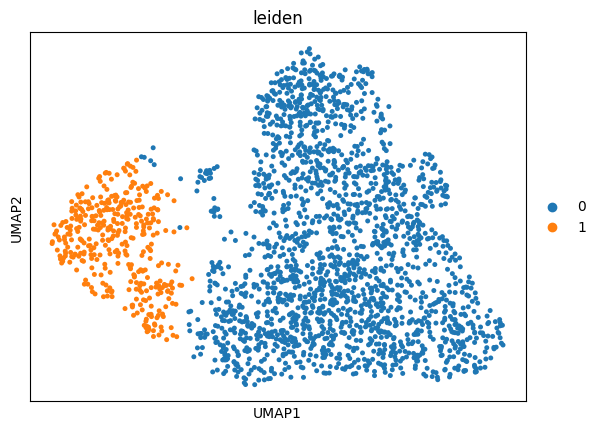

In [43]:
sc.pl.umap(adata_adnt, color=['leiden'])
plt.show()

In [44]:
de_adnt = vae_adnt.differential_expression(groupby='leiden')

DE...: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


In [45]:
de_adnt = de_adnt[
    (de_adnt['proba_de'] > 0.95) &
    (de_adnt['bayes_factor'] > 1) &
    (de_adnt['lfc_mean'] > 1)
]

In [46]:
adnt_group = de_adnt.groupby('comparison')

In [47]:
adnt_markers = {name: adnt_group.get_group(name).index.tolist()[:10] for name in adnt_group.groups.keys()}

In [49]:
symbols = []
for name in adnt_markers:
    symbols.extend(list(map(to_curly,adnt_markers[name])))

c:\Users\xuqin\miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


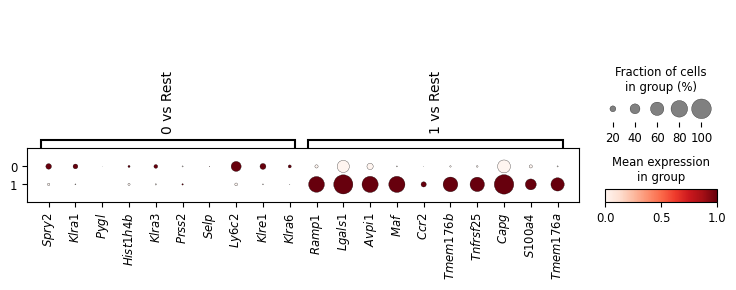

In [50]:
ax = sc.pl.dotplot(
    adata_adnt,
    adnt_markers,
    groupby='leiden',
    use_raw=True,
    standard_scale='var',
    show=False)

ax['mainplot_ax'].set_xticklabels(symbols)
plt.show()